In [1]:
# Import Libraries and Dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
import os 
import json
import panel as pn
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt

# Generic Momentum Screen

## Data Preparation - Week 1 

In [2]:
# Pick up the date we grabbed in our acquisition. Don't really need to rebalance often, so it doesn't make sense to pull via sdk and waste the message count of whatever service we use. 
file_path = Path('../Resources/MSR_sp500_5yr_close.csv')

sp500_close = pd.read_csv(file_path,
                         parse_dates=True,
                         index_col = 'date',
                         infer_datetime_format=True)
sp500_close.head()

date.1  date.2     MMM    ABT  \
date                                                                         
2015-04-06 00:00:00+00:00  2015-04-06T00:00:00.000Z    5.10  165.48  46.30   
2015-04-07 00:00:00+00:00  2015-04-07T00:00:00.000Z    5.12  166.21  46.19   
2015-04-08 00:00:00+00:00  2015-04-08T00:00:00.000Z    5.19  166.27  46.61   
2015-04-09 00:00:00+00:00  2015-04-09T00:00:00.000Z    5.28  166.79  47.00   
2015-04-10 00:00:00+00:00  2015-04-10T00:00:00.000Z    5.28  167.07  47.15   

                            ABBV   ABMD    ACN    ATVI   ADBE   AMD  ...  \
date                                                                 ...   
2015-04-06 00:00:00+00:00  57.61  70.87  95.69  22.670  76.23  2.70  ...   
2015-04-07 00:00:00+00:00  58.42  69.73  96.39  22.770  75.65  2.70  ...   
2015-04-08 00:00:00+00:00  58.81  69.63  95.12  22.960  75.44  2.71  ...   
2015-04-09 00:00:00+00:00  60.32  69.80  95.47  23.000  76.33  2.72  ...   
2015-04-10 00:00:00+00:00  62.00  69.35  94.69  22.925  76.53  2.76  ...   

                           WLTW    WYNN    XEL    XRX    XLNX    XYL    YUM  \
date                                                                          
2015-04-06 00:00:00+00:00   NaN  130.72  35.05  12.95  41.990  36.07  79.73   
2015-04-07 00:00:00+00:00   NaN  127.88  34.51  12.96  42.330  36.07  78.29   
2015-04-08 00:00:00+00:00   NaN  129.28  34.43  13.10  42.550  35.25  78.30   
2015-04-09 00:00:00+00:00   NaN  136.63  34.32  13.13  43.325  34.96  78.92   
2015-04-10 00:00:00+00:00   NaN  136.02  34.67  13.26  43.830  35.20  80.02   

                              ZBH    ZION    ZTS  
date                                              
2015-04-06 00:00:00+00:00  117.36  26.900  46.33  
2015-04-07 00:00:00+00:00  116.01  27.210  46.36  
2015-04-08 00:00:00+00:00  116.12  27.270  46.21  
2015-04-09 00:00:00+00:00  117.20  27.535  46.55  
2015-04-10 00:00:00+00:00  117.45  27.330  47.17  

[5 rows x 505 columns]

In [3]:
# End of dataset for determining FIP
last_day = "2020-03-02 00:00:00+00:00"
end = (sp500_close.index.get_loc(last_day))-len(sp500_close)

In [4]:
mid = sp500_close[(end+(-21*12)):(end-21)]
mid.tail()

date.1  date.2     MMM    ABT   ABBV    ABMD  \
date                                                                     
2020-01-23 00:00:00+00:00    NaN     NaN  177.74  90.73  85.27  184.46   
2020-01-24 00:00:00+00:00    NaN     NaN  178.15  90.40  83.54  182.98   
2020-01-27 00:00:00+00:00    NaN     NaN  175.63  89.59  84.02  181.45   
2020-01-28 00:00:00+00:00    NaN     NaN  165.58  89.54  83.77  187.01   
2020-01-29 00:00:00+00:00    NaN     NaN  162.00  89.14  83.20  188.85   

                              ACN   ATVI    ADBE    AMD  ...    WLTW    WYNN  \
date                                                     ...                   
2020-01-23 00:00:00+00:00  210.68  60.13  351.76  51.71  ...  206.66  139.11   
2020-01-24 00:00:00+00:00  208.57  59.40  351.37  50.35  ...  209.01  134.75   
2020-01-27 00:00:00+00:00  206.55  58.32  346.90  49.26  ...  207.43  123.89   
2020-01-28 00:00:00+00:00  210.24  60.03  354.63  50.53  ...  213.00  124.97   
2020-01-29 00:00:00+00:00  207.96  60.40  351.66  47.51  ...  212.66  123.85   

                             XEL    XRX    XLNX    XYL     YUM     ZBH   ZION  \
date                                                                            
2020-01-23 00:00:00+00:00  66.90  36.23  102.41  82.36  105.98  149.51  47.79   
2020-01-24 00:00:00+00:00  67.17  35.52  100.80  81.48  104.98  147.80  46.63   
2020-01-27 00:00:00+00:00  66.92  35.05   97.00  80.22  104.39  148.04  46.46   
2020-01-28 00:00:00+00:00  67.22  36.78   98.61  81.27  104.82  149.20  47.09   
2020-01-29 00:00:00+00:00  67.42  36.73   88.06  83.17  106.63  150.75  46.37   

                              ZTS  
date                               
2020-01-23 00:00:00+00:00  138.34  
2020-01-24 00:00:00+00:00  136.31  
2020-01-27 00:00:00+00:00  135.96  
2020-01-28 00:00:00+00:00  138.26  
2020-01-29 00:00:00+00:00  138.51  

[5 rows x 505 columns]

In [5]:
short = sp500_close[(end+(-21)):(end-5)]
short.tail()

date.1  date.2     MMM    ABT   ABBV    ABMD  \
date                                                                     
2020-02-14 00:00:00+00:00    NaN     NaN  161.01  89.66  94.05  167.22   
2020-02-18 00:00:00+00:00    NaN     NaN  158.88  88.88  93.61  169.00   
2020-02-19 00:00:00+00:00    NaN     NaN  159.34  89.36  94.14  167.90   
2020-02-20 00:00:00+00:00    NaN     NaN  158.56  88.46  94.23  168.08   
2020-02-21 00:00:00+00:00    NaN     NaN  156.93  87.45  94.96  166.74   

                              ACN    ATVI    ADBE    AMD  ...    WLTW    WYNN  \
date                                                      ...                   
2020-02-14 00:00:00+00:00  212.37  63.520  379.67  55.31  ...  213.67  132.14   
2020-02-18 00:00:00+00:00  213.76  63.740  378.85  56.89  ...  212.69  133.46   
2020-02-19 00:00:00+00:00  215.92  64.370  383.28  58.90  ...  211.76  136.17   
2020-02-20 00:00:00+00:00  213.90  64.000  378.96  57.27  ...  209.50  133.33   
2020-02-21 00:00:00+00:00  211.89  63.375  372.95  53.28  ...  208.44  127.95   

                             XEL    XRX   XLNX    XYL     YUM     ZBH   ZION  \
date                                                                           
2020-02-14 00:00:00+00:00  70.26  37.82  90.17  88.14  105.28  160.40  46.26   
2020-02-18 00:00:00+00:00  71.16  37.22  89.24  88.05  104.03  159.25  45.09   
2020-02-19 00:00:00+00:00  70.79  36.77  90.71  87.96  105.19  160.02  45.81   
2020-02-20 00:00:00+00:00  70.67  36.78  89.79  88.66  103.87  158.39  46.25   
2020-02-21 00:00:00+00:00  70.82  36.34  87.72  88.52  103.51  157.39  45.43   

                              ZTS  
date                               
2020-02-14 00:00:00+00:00  144.17  
2020-02-18 00:00:00+00:00  143.65  
2020-02-19 00:00:00+00:00  144.06  
2020-02-20 00:00:00+00:00  143.55  
2020-02-21 00:00:00+00:00  142.23  

[5 rows x 505 columns]

In [6]:
overall_returns_mid = mid.pct_change()
cum_returns_mid = ((1+overall_returns_mid).cumprod()-1).iloc[[-1]]

overall_returns_short = short.pct_change()
cum_returns_short = ((1+overall_returns_short).cumprod()-1).iloc[[-1]]

## Generic Momentum - Week 1

In [7]:
# Begin the process of moving the horizontal dataframe back to a vertical dataframe. 
return_list_mid = cum_returns_mid.stack()
return_list_short = cum_returns_short.stack()
return_list_mid

date                           
2020-01-29 00:00:00+00:00  MMM    -0.219239
                           ABT     0.134241
                           ABBV    0.038702
                           ABMD   -0.457421
                           ACN     0.266504
                                     ...   
                           XYL     0.089040
                           YUM     0.118066
                           ZBH     0.202057
                           ZION   -0.093805
                           ZTS     0.446580
Length: 502, dtype: float64

In [8]:
df_mid = return_list_mid.to_frame().reset_index()
df_short = return_list_short.to_frame().reset_index()
df_mid.head()

date level_1         0
0 2020-01-29 00:00:00+00:00     MMM -0.219239
1 2020-01-29 00:00:00+00:00     ABT  0.134241
2 2020-01-29 00:00:00+00:00    ABBV  0.038702
3 2020-01-29 00:00:00+00:00    ABMD -0.457421
4 2020-01-29 00:00:00+00:00     ACN  0.266504

In [9]:
# Clean up the dataframe
df_mid.rename(columns={0:"return","level_1":"symbol"}, inplace=True)
df_short.rename(columns={0:"return","level_1":"symbol"}, inplace=True)

df_mid.drop(columns=['date'], inplace=True)
df_short.drop(columns=['date'], inplace=True)

df_mid.set_index(df_mid['symbol'], inplace = True)
df_short.set_index(df_short['symbol'], inplace = True)

df_mid.drop(columns=['symbol'], inplace=True)
df_short.drop(columns=['symbol'], inplace=True)

df_mid.sort_values(['return'],ascending=False,inplace=True)
df_short.sort_values(['return'],ascending=False,inplace=True)

df_mid['decile_rank']=pd.qcut(df_mid['return'],10,labels=False)
df_short['decile_rank']=pd.qcut(df_short['return'],10,labels=False)

df_mid.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_mid=df_mid.loc[df_mid['decile_rank']==9]

df_short.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_short=df_short.loc[df_short['decile_rank']==9]

### FIP = sign(Past Return) * [% negative - % positive]

In [10]:
#Cam - before we do this step we need to (1) bin and take the top decile. Need to drop the date, bin, and then determine the tickers
# that have the top returns. Then we need to take those returns and come back through this process. 

# The signal here is that we need to remove "low quality" momentum. Stocks that "pop" are shown to be overpriced and generally under-
# perform. The underperformance is the result of mispricing caused by biased investors whom overpay for lottery-like stocks. 

# The more negative the FIP, the better. We are seperating high momentum stocks into those that have more continuous price paths. 
    # If FIP scores are positive, then automatically the security had poor returns over the last year (it was a negative number). 
    # If FIP is a little negative, it had positive returns, but a bumpy ride. 
    # If FIP is very negative, then smoother path, which reflects the behavioral irrational decision making of "lack of attention". 
    # The lack of attention is the best momentum, where these securities are more likely to suffer from why momentum stocks outperform:
    # investors are systematically underreacting to positive news. 

fip_scores_mid = []
for column in overall_returns_mid.columns:
    num_positive_mid = len(overall_returns_mid.loc[overall_returns_mid[column] > 0])
    num_negative_mid = len(overall_returns_mid.loc[overall_returns_mid[column] < 0])
    num_zero_mid = len(overall_returns_mid.loc[overall_returns_mid[column] == 0])
    num_days_mid = len(overall_returns_mid)
    cum_returns_mid = overall_returns_mid[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_mid = np.sign(cum_returns_mid) * (num_negative_mid / num_days_mid - num_positive_mid/num_days_mid)
    
    fip_scores_mid.append(fip_score_mid)
    
fip_scores_short = []
for column in overall_returns_short.columns:
    num_positive_short = len(overall_returns_short.loc[overall_returns_short[column] > 0])
    num_negative_short = len(overall_returns_short.loc[overall_returns_short[column] < 0])
    num_zero_short = len(overall_returns_short.loc[overall_returns_short[column] == 0])
    num_days_short = len(overall_returns_short)
    cum_returns_short = overall_returns_short[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_short = np.sign(cum_returns_short) * (num_negative_short / num_days_short - num_positive_short/num_days_short)
    
    fip_scores_short.append(fip_score_short)

In [11]:
fip_scores_series_mid = pd.Series(fip_scores_mid, index = overall_returns_mid.columns)
fip_scores_series_mid.name = "fip_scores_mid"

fip_scores_series_short = pd.Series(fip_scores_short, index = overall_returns_short.columns)
fip_scores_series_short.name = "fip_scores_short"

In [12]:
import plotly.express as px
import seaborn as sns

In [13]:
x_mid = top_decile_mid.merge(fip_scores_series_mid, right_index = True, left_index = True).sort_values(by = 'fip_scores_mid', ascending = True)[:5]
x_short = top_decile_short.merge(fip_scores_series_short, right_index = True, left_index = True).sort_values(by = 'fip_scores_short', ascending = True)[:5]

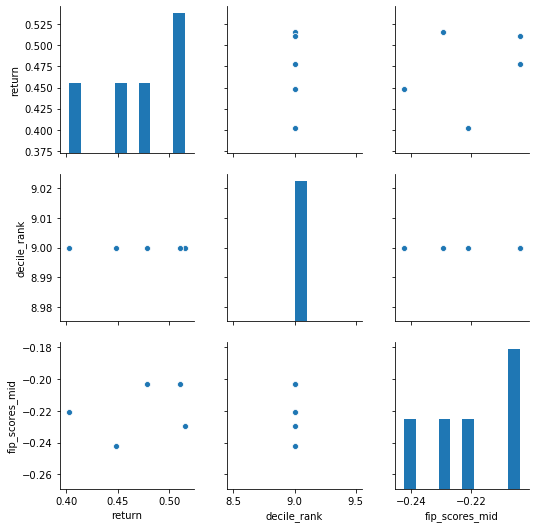

In [14]:
sns.pairplot(x_mid)

In [15]:
mid_stocks = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_mid.index:
        mid_stocks[i] = sp500_close[i]

In [16]:
short_stocks = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_short.index:
        short_stocks[i] = sp500_close[i]

In [17]:
# Determine the last price from test +1
short_last_day_loc = short_stocks.index.get_loc(last_day)
last_price = short_stocks.iloc[short_last_day_loc]
last_price

AMD      47.46
AMG      78.36
EQIX    618.88
JKHY    158.73
NEM      46.83
Name: 2020-03-02 00:00:00+00:00, dtype: float64

In [18]:
# Determine the portfolio weight based on last trade day and $1000 investment
portfolio_weights = []
for ticker in last_price:
    weight = 200/ticker
    portfolio_weights.append(weight)

In [19]:
# Create a column for portfolio value over time based on weight of stocks above
short_stocks["portfolio_value"] = short_stocks.dot(portfolio_weights)

In [20]:
# Create a columns for percent change 1 day and 5 days
short_stocks["port_val_chg_1_days"] = short_stocks.portfolio_value.pct_change(periods=1)
short_stocks["port_val_chg_5_days"] = short_stocks.portfolio_value.pct_change(periods=5)

In [21]:
# Create a column for portfolio value over time based on weight of stocks above
bin_list = []
bin_list = short_stocks["port_val_chg_5_days"].tolist()
bin_calc = [1 if v >= 0 else 0 for v in bin_list]
short_stocks["port_val_chg_5_days_bin"] = bin_calc

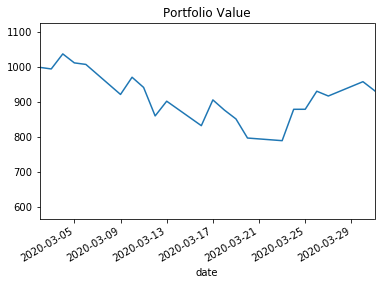

In [22]:
# Chart results
short_stocks.portfolio_value.plot(title="Portfolio Value",xlim=("2020-03-02 00:00:00+00:00","2020-03-31 00:00:00+00:00"))

## Data Preparation - Week 1

In [23]:
# End of dataset for determining FIP
last_day_wk2 = "2020-03-10 00:00:00+00:00"
end2 = (sp500_close.index.get_loc(last_day_wk2))-len(sp500_close)

In [24]:
mid2 = sp500_close[(end2+(-21*12)):(end2-21)]
mid2.tail()

date.1  date.2     MMM    ABT   ABBV    ABMD  \
date                                                                     
2020-01-31 00:00:00+00:00    NaN     NaN  158.66  87.14  81.02  186.29   
2020-02-03 00:00:00+00:00    NaN     NaN  156.59  87.06  82.30  185.95   
2020-02-04 00:00:00+00:00    NaN     NaN  157.24  88.23  84.36  190.90   
2020-02-05 00:00:00+00:00    NaN     NaN  162.33  89.56  86.63  190.73   
2020-02-06 00:00:00+00:00    NaN     NaN  162.89  89.47  87.18  196.01   

                              ACN   ATVI    ADBE    AMD  ...    WLTW    WYNN  \
date                                                     ...                   
2020-01-31 00:00:00+00:00  205.21  58.48  351.14  47.00  ...  211.29  126.16   
2020-02-03 00:00:00+00:00  207.80  58.21  358.00  48.02  ...  215.11  128.58   
2020-02-04 00:00:00+00:00  212.53  59.21  366.74  49.45  ...  218.57  132.70   
2020-02-05 00:00:00+00:00  212.22  58.85  365.55  49.84  ...  220.06  132.28   
2020-02-06 00:00:00+00:00  214.16  60.26  367.46  49.32  ...  208.90  134.19   

                             XEL    XRX   XLNX    XYL     YUM     ZBH    ZION  \
date                                                                            
2020-01-31 00:00:00+00:00  69.19  35.57  84.48  81.66  105.77  147.90  45.490   
2020-02-03 00:00:00+00:00  69.45  36.29  85.05  83.34  106.41  148.51  46.105   
2020-02-04 00:00:00+00:00  69.30  36.57  85.78  86.51  106.71  156.77  46.680   
2020-02-05 00:00:00+00:00  69.30  37.62  88.23  87.61  106.78  157.70  48.010   
2020-02-06 00:00:00+00:00  69.30  37.68  87.72  83.12  103.74  159.01  47.010   

                              ZTS  
date                               
2020-01-31 00:00:00+00:00  134.21  
2020-02-03 00:00:00+00:00  135.52  
2020-02-04 00:00:00+00:00  138.97  
2020-02-05 00:00:00+00:00  137.89  
2020-02-06 00:00:00+00:00  138.97  

[5 rows x 505 columns]

In [25]:
short2 = sp500_close[(end2+(-21)):(end2-5)]
short2.tail()

date.1  date.2     MMM    ABT   ABBV    ABMD  \
date                                                                     
2020-02-25 00:00:00+00:00    NaN     NaN  146.85  81.13  89.18  158.80   
2020-02-26 00:00:00+00:00    NaN     NaN  148.96  81.36  88.41  154.09   
2020-02-27 00:00:00+00:00    NaN     NaN  150.16  79.19  85.42  153.97   
2020-02-28 00:00:00+00:00    NaN     NaN  149.24  77.03  85.71  150.26   
2020-03-02 00:00:00+00:00    NaN     NaN  153.02  81.61  88.69  155.10   

                              ACN   ATVI    ADBE    AMD  ...    WLTW    WYNN  \
date                                                     ...                   
2020-02-25 00:00:00+00:00  197.10  59.51  347.80  47.57  ...  202.64  113.89   
2020-02-26 00:00:00+00:00  195.67  59.37  351.34  47.49  ...  204.44  110.75   
2020-02-27 00:00:00+00:00  186.44  58.33  337.52  44.01  ...  194.53  111.16   
2020-02-28 00:00:00+00:00  180.59  58.13  345.12  45.48  ...  189.25  107.98   
2020-03-02 00:00:00+00:00  189.55  60.59  360.28  47.46  ...  199.54  107.94   

                             XEL    XRX   XLNX    XYL    YUM     ZBH    ZION  \
date                                                                           
2020-02-25 00:00:00+00:00  68.84  36.46  83.88  84.33  97.95  149.73  42.380   
2020-02-26 00:00:00+00:00  68.35  35.73  82.60  83.93  97.50  146.56  41.815   
2020-02-27 00:00:00+00:00  64.85  33.83  79.49  80.66  92.67  139.95  40.590   
2020-02-28 00:00:00+00:00  62.32  32.20  83.49  77.34  89.25  136.15  39.950   
2020-03-02 00:00:00+00:00  65.87  33.51  84.61  82.29  92.53  139.25  41.300   

                              ZTS  
date                               
2020-02-25 00:00:00+00:00  134.82  
2020-02-26 00:00:00+00:00  136.15  
2020-02-27 00:00:00+00:00  133.95  
2020-02-28 00:00:00+00:00  133.23  
2020-03-02 00:00:00+00:00  138.91  

[5 rows x 505 columns]

In [26]:
overall_returns_mid2=mid2.pct_change()
cum_returns_mid2=((1+overall_returns_mid2).cumprod()-1).iloc[[-1]]

overall_returns_short2=short2.pct_change()
cum_returns_short2=((1+overall_returns_short2).cumprod()-1).iloc[[-1]]

## Generic Momentum - Week 2

In [27]:
#Begin the process of moving the horizontal dataframe back to a vertical dataframe. 
return_list_mid2 = cum_returns_mid2.stack()
return_list_short2 = cum_returns_short2.stack()
return_list_mid2

date                           
2020-02-06 00:00:00+00:00  MMM    -0.213472
                           ABT     0.149852
                           ABBV    0.116547
                           ABMD   -0.385934
                           ACN     0.306332
                                     ...   
                           XYL     0.081025
                           YUM     0.060845
                           ZBH     0.309694
                           ZION   -0.037863
                           ZTS     0.467012
Length: 502, dtype: float64

In [28]:
df_mid2 = return_list_mid2.to_frame().reset_index()
df_short2 = return_list_short2.to_frame().reset_index()
df_mid2.head()

date level_1         0
0 2020-02-06 00:00:00+00:00     MMM -0.213472
1 2020-02-06 00:00:00+00:00     ABT  0.149852
2 2020-02-06 00:00:00+00:00    ABBV  0.116547
3 2020-02-06 00:00:00+00:00    ABMD -0.385934
4 2020-02-06 00:00:00+00:00     ACN  0.306332

In [29]:
df_mid2.rename(columns ={0:"return","level_1":"symbol"}, inplace = True)
df_short2.rename(columns ={0:"return","level_1":"symbol"}, inplace = True)

df_mid2.drop(columns=['date'], inplace=True)
df_short2.drop(columns=['date'], inplace=True)

df_mid2.set_index(df_mid2['symbol'], inplace = True)
df_short2.set_index(df_short2['symbol'], inplace = True)

df_mid2.drop(columns=['symbol'], inplace=True)
df_short2.drop(columns=['symbol'], inplace=True)

df_mid2.sort_values(['return'],ascending=False,inplace=True)
df_short2.sort_values(['return'],ascending=False,inplace=True)

df_mid2['decile_rank']=pd.qcut(df_mid2['return'],10,labels=False)
df_short2['decile_rank']=pd.qcut(df_short2['return'],10,labels=False)

df_mid2.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_mid2=df_mid2.loc[df_mid2['decile_rank']==9]

df_short2.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_short2=df_short2.loc[df_short2['decile_rank']==9]

### FIP = sign(Past Return) * [% negative - % positive]

In [30]:
# The signal here is that we need to remove "low quality" momentum. Stocks that "pop" are shown to be overpriced and generally under-perform. The underperformance is the result of mispricing caused by biased investors whom overpay for lottery-like stocks. 

# The more negative the FIP, the better. We are seperating high momentum stocks into those that have more continuous price paths. 
    # If FIP scores are positive, then automatically the security had poor returns over the last year (it was a negative number). 
    # If FIP is a little negative, it had positive returns, but a bumpy ride. 
    # If FIP is very negative, then smoother path, which reflects the behavioral irrational decision making of "lack of attention". 
    # The lack of attention is the best momentum, where these securities are more likely to suffer from why momentum stocks outperform:
    # investors are systematically underreacting to positive news. 

fip_scores_mid2 = []
for column in overall_returns_mid2.columns:
    num_positive_mid2 = len(overall_returns_mid2.loc[overall_returns_mid2[column] > 0])
    num_negative_mid2 = len(overall_returns_mid2.loc[overall_returns_mid2[column] < 0])
    num_zero_mid2 = len(overall_returns_mid2.loc[overall_returns_mid2[column] == 0])
    num_days_mid2 = len(overall_returns_mid2)
    cum_returns_mid2 = overall_returns_mid2[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_mid2 = np.sign(cum_returns_mid2) * (num_negative_mid2 / num_days_mid2 - num_positive_mid2/num_days_mid2)
    
    fip_scores_mid2.append(fip_score_mid2)
    
fip_scores_short2 = []
for column in overall_returns_short2.columns:
    num_positive_short2 = len(overall_returns_short2.loc[overall_returns_short2[column] > 0])
    num_negative_short2 = len(overall_returns_short2.loc[overall_returns_short2[column] < 0])
    num_zero_short2 = len(overall_returns_short2.loc[overall_returns_short2[column] == 0])
    num_days_short2 = len(overall_returns_short2)
    cum_returns_short2 = overall_returns_short2[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_short2 = np.sign(cum_returns_short2) * (num_negative_short2 / num_days_short2 - num_positive_short2/num_days_short2)
    
    fip_scores_short2.append(fip_score_short2)

In [31]:
fip_scores_series_mid2 = pd.Series(fip_scores_mid2, index = overall_returns_mid2.columns)
fip_scores_series_mid2.name = "fip_scores_mid2"

fip_scores_series_short2 = pd.Series(fip_scores_short2, index = overall_returns_short2.columns)
fip_scores_series_short2.name = "fip_scores_short2"

In [32]:
x_mid2 = top_decile_mid2.merge(fip_scores_series_mid2, right_index = True, left_index = True).sort_values(by = 'fip_scores_mid2', ascending = True)[:5]
x_short2 = top_decile_short2.merge(fip_scores_series_short2, right_index = True, left_index = True).sort_values(by = 'fip_scores_short2', ascending = True)[:5]

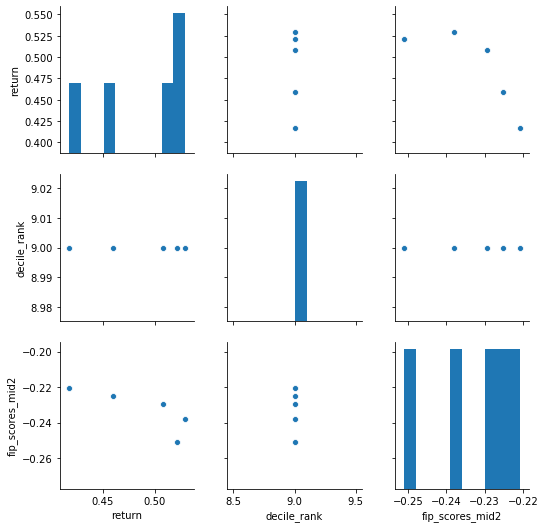

In [33]:
sns.pairplot(x_mid2)

In [34]:
mid_stocks2 = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_mid2.index:
        mid_stocks2[i] = sp500_close[i]

In [35]:
short_stocks2 = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_short2.index:
        short_stocks2[i] = sp500_close[i]

In [36]:
# Determine last price from test +1
short_last_day_loc2 = short_stocks2.index.get_loc(last_day)
last_price2 = short_stocks2.iloc[short_last_day_loc]
last_price2

CLX     172.01
DG      159.60
NEM      46.83
REGN    464.75
ROL      39.11
Name: 2020-03-02 00:00:00+00:00, dtype: float64

In [37]:
# Determine portfolio weight based on last trade day and $1000 investment
portfolio_weights2 = []
for ticker in last_price2:
    weight2 = 200/ticker
    portfolio_weights2.append(weight2)

In [38]:
# Create a column for portfolio value over time based on weight of stocks above
short_stocks2["portfolio_value"] = short_stocks2.dot(portfolio_weights2)

In [39]:
# Create a columns for percent change 1 day and 5 days
short_stocks2["port_val_chg_1_days"] = short_stocks2.portfolio_value.pct_change(periods=1)
short_stocks2["port_val_chg_5_days"] = short_stocks2.portfolio_value.pct_change(periods=5)

In [40]:
# Create a column for portfolio value over time based on weight of stocks above
bin_list2 = []
bin_list2 = short_stocks2["port_val_chg_5_days"].tolist()
bin_calc2 = [1 if v >= 0 else 0 for v in bin_list2]
short_stocks2["port_val_chg_5_days_bin"] = bin_calc2

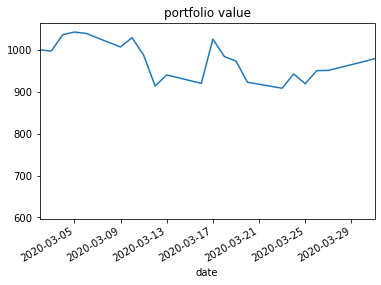

In [41]:
# Chart results
short_stocks2.portfolio_value.plot(title="portfolio value",xlim=("2020-03-02 00:00:00+00:00","2020-03-31 00:00:00+00:00"))

# LSTM Stock Predictor using Closing Prices

In [42]:
# Set the random seed for reproducibility
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

## Week 1

### Data Prepartion 

In [43]:
# Load the stock prices
SP500_full = pd.read_csv('../Resources/sp500_mom_short_wk1.csv', index_col='date',infer_datetime_format=True, parse_dates=True)
SP500_full.reset_index(inplace=True)
SP500_full['date'] = SP500_full['date'].dt.date
SP500_full.index = pd.to_datetime(SP500_full['date'])
SP500_full.drop(columns=['date'],inplace=True)
SP500_full.tail()

AMD    AMG    EQIX    JKHY    NEM  portfolio_value
date                                                            
2020-03-30  47.86  60.43  644.87  156.05  46.36       958.937465
2020-03-31  45.48  59.14  624.57  155.24  45.28       933.422204
2020-04-01  43.66  56.15  595.46  147.08  46.47       903.514428
2020-04-02  44.49  56.72  626.15  151.16  48.23       931.042205
2020-04-03  42.59  55.36  624.69  156.21  47.15       920.843062

In [44]:
# Trimmed the dataframe to the end of February. 
df = SP500_full.loc[:'2020-03-01']

In [45]:
# This function accepts the column number for the features (X) and the target (y):
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [46]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Try a window size anywhere from 1 to 10 and see how the model performance changes

# Creating the features (X) and target (y) data using the window_data() function.
window_size = 2

# Column index 1 is the `Close` column
feature_column = 5
target_column = 5
X, y = window_data(df, window_size, feature_column, target_column)

In [47]:
# Use 70% of the data for training and the remaineder for testing
from sklearn.model_selection import train_test_split

split = int(0.7 *len(X))
X_train_rnn = X[: split -1]
X_test = X[split:]
y_train_rnn = y[: split -1]
y_test = y[split:]

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [48]:
# Use MinMaxScaler to scale the data between 0 and 1. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X_train_rnn = scaler.transform(X_train_rnn)
X_val_rnn = scaler.transform(X_val_rnn)
X_test = scaler.transform(X_test)

scaler.fit(y)
y_train_rnn = scaler.transform(y_train_rnn)
y_val_rnn = scaler.transform(y_val_rnn)
y_test = scaler.transform(y_test)

In [49]:
# Reshape the features for the model
X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_val_rnn = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print (f"X_train sample values:\n{X_train_rnn[:5]} \n")
print (f"X_val_rnn sample values:\n{X_val_rnn[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.4512657 ]
  [0.44055155]]

 [[0.4151856 ]
  [0.37794777]]

 [[0.31001936]
  [0.32488867]]

 [[0.44391528]
  [0.44834718]]

 [[0.27086649]
  [0.26925926]]] 

X_val_rnn sample values:
[[[0.64074951]
  [0.63667901]]

 [[0.522734  ]
  [0.519189  ]]

 [[0.52978507]
  [0.52140459]]

 [[0.40231652]
  [0.40889853]]

 [[0.66482769]
  [0.66403314]]] 

X_test sample values:
[[[0.71198912]
  [0.70231599]]

 [[0.70231599]
  [0.72291133]]

 [[0.72291133]
  [0.72538546]]

 [[0.72538546]
  [0.74878022]]

 [[0.74878022]
  [0.73121125]]]


### Build and Train the LSTM RNN

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [51]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
model = Sequential()

number_units = 100
dropout_fraction = 0.7

# First Layer:
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train_rnn.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Second Layer:
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Third Layer:
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Fourth Layer:
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output Layer:
model.add(Dense(1))

In [52]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [53]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 2, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

In [54]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
batch_size = 60
epochs = 250
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Train on 646 samples, validate on 216 samples
Epoch 1/250
646/646 [==============================] - 10s 15ms/sample - loss: 0.2448 - val_loss: 0.1828
Epoch 2/250
646/646 [==============================] - 0s 231us/sample - loss: 0.0989 - val_loss: 0.0256
Epoch 3/250
646/646 [==============================] - 0s 386us/sample - loss: 0.0459 - val_loss: 0.0286
Epoch 4/250
646/646 [==============================] - 0s 238us/sample - loss: 0.0399 - val_loss: 0.0283
Epoch 5/250
646/646 [==============================] - 0s 225us/sample - loss: 0.0322 - val_loss: 0.0192
Epoch 6/250
646/646 [==============================] - 0s 218us/sample - loss: 0.0306 - val_loss: 0.0184
Epoch 7/250
646/646 [==============================] - 0s 255us/sample - loss: 0.0253 - val_loss: 0.0085
Epoch 8/250
646/646 [==============================] - 0s 232us/sample - loss: 0.0204 - val_loss: 0.0039
Epoch 9/250
646/646 [==============================] - 0s 209us/sample - loss: 0.0162 - val_loss: 0.0037
Epoch 10/

### Model Performance

In [55]:
# Evaluate the model
model.evaluate(X_test, y_test)

370/370 [==============================] - 0s 105us/sample - loss: 8.3896e-04


0.00083896015846246

In [56]:
seq = df[df.columns[feature_column]][-2:].tolist()
forecast = []
for i in range (5):
    prediction = model.predict([np.array(seq).reshape(1,X_train_rnn.shape[1],1)])
    seq.append(prediction[0][0])
    seq.pop(0)
    forecast.append([prediction[0][0]])

In [57]:
forecast_scaled = scaler.inverse_transform(forecast)

In [58]:
fwd_prices = forecast_scaled.ravel()

In [59]:
# Make some predictions
predicted = model.predict(X_test)

In [60]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [61]:
# Create a DataFrame of Real and Predicted values
stock_closing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stock_closing.head()

Real   Predicted
0  959.714599  942.876282
1  960.975965  942.593506
2  972.903084  949.832275
3  963.946068  954.004333
4  982.537176  959.291992

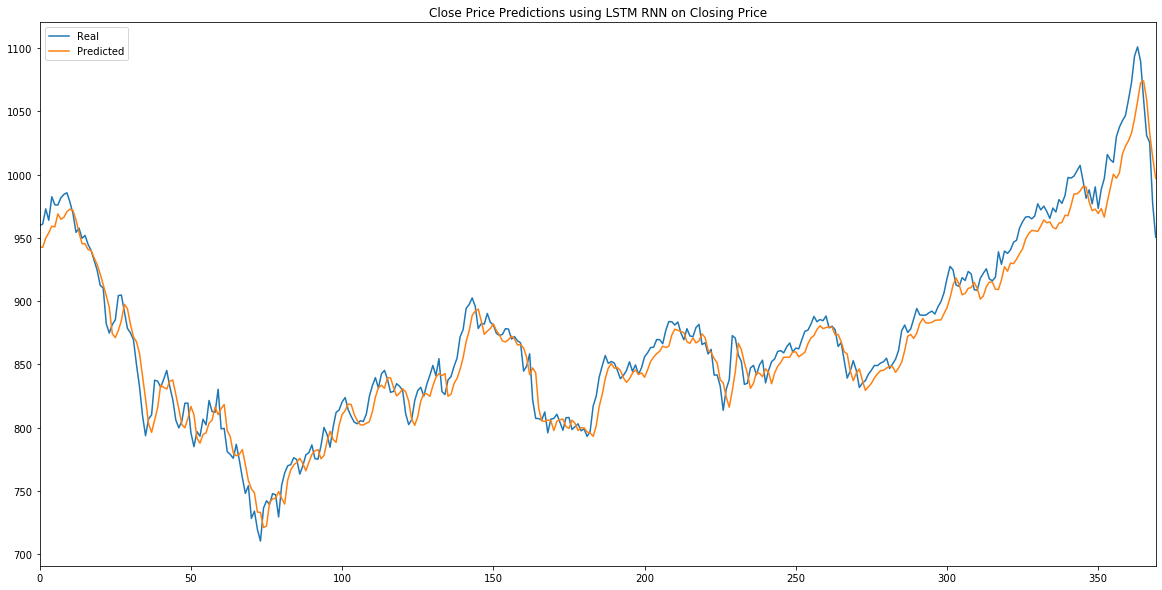

In [62]:
# Plot the real vs predicted values as a line chart
STOCK_CLOSE = stock_closing.plot(title='Close Price Predictions using LSTM RNN on Closing Price',figsize=(20,10))

In [63]:
real_prices = SP500_full[SP500_full.columns[feature_column]]['2020-03-02':'2020-03-07'].tolist()

In [64]:
A = SP500_full.loc['2020-03-02':'2020-03-06'].index

In [65]:
out_of_sample = pd.DataFrame({'Real_Prices':real_prices,
                          'Look_Fwd_Prices':fwd_prices},
                          index=A)
out_of_sample

Real_Prices  Look_Fwd_Prices
date                                    
2020-03-02  1000.000000      1152.880432
2020-03-03   995.393589      1168.900738
2020-03-04  1038.476181      1124.075496
2020-03-05  1012.783297      1122.698693
2020-03-06  1008.364852      1096.231236

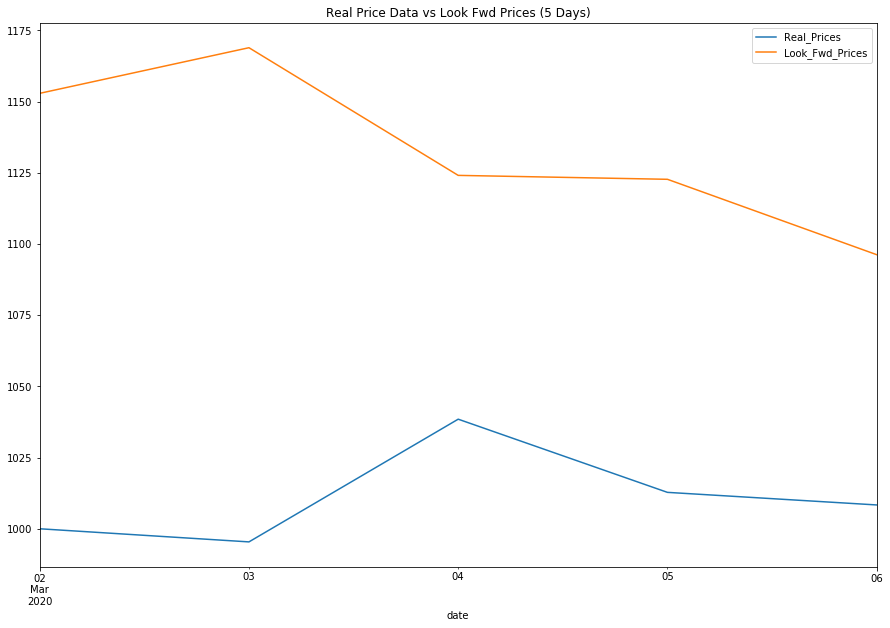

In [66]:
OUT_SAMP = out_of_sample.plot(figsize=(15,10), title='Real Price Data vs Look Fwd Prices (5 Days)')

In [67]:
look_fwd = pd.concat([SP500_full[SP500_full.columns[feature_column]][:'2020-03-06'],out_of_sample],axis=1,join='outer')

In [68]:
look_fwd_2020 = look_fwd.iloc[-90:]

In [69]:
look_fwd_2020.drop(columns=['Real_Prices'], inplace=True)
look_fwd_2020

C:\Users\selva\Anaconda3\envs\vizenv\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



portfolio_value  Look_Fwd_Prices
date                                        
2019-10-28       876.527181              NaN
2019-10-29       881.093964              NaN
2019-10-30       875.235610              NaN
2019-10-31       878.069564              NaN
2019-11-01       886.155990              NaN
...                     ...              ...
2020-03-02      1000.000000      1152.880432
2020-03-03       995.393589      1168.900738
2020-03-04      1038.476181      1124.075496
2020-03-05      1012.783297      1122.698693
2020-03-06      1008.364852      1096.231236

[90 rows x 2 columns]

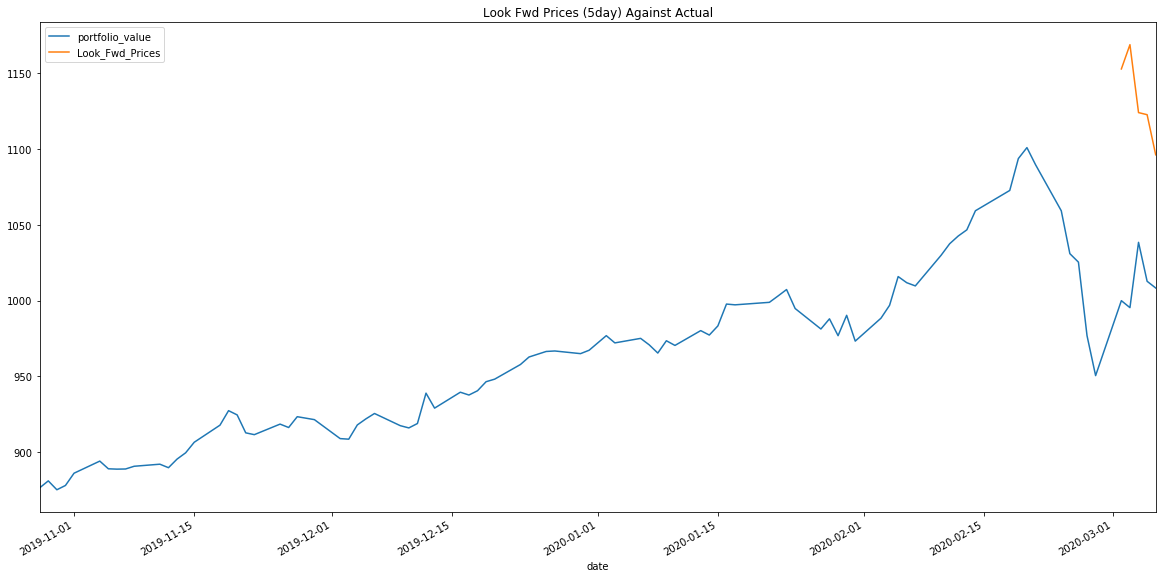

In [70]:
LOOK_FWD_2020=look_fwd_2020.plot(figsize=(20,10),title='Look Fwd Prices (5day) Against Actual')

## Week 2

### Data Preparation

In [71]:
# Load the stock prices
week2_stocks = pd.read_csv('../Resources/sp500_mom_short_wk2.1.csv', index_col='date',infer_datetime_format=True, parse_dates=True)
week2_stocks.reset_index(inplace=True)
week2_stocks['date'] = week2_stocks['date'].dt.date
week2_stocks.index = pd.to_datetime(week2_stocks['date'])
week2_stocks.drop(columns=['date'],inplace=True)
week2_stocks.tail()

CLX      DG    NEM    REGN    ROL  portfolio_value
date                                                             
2020-03-30  174.48  146.77  46.36  473.00  35.84       971.615201
2020-03-31  173.25  151.01  45.28  488.29  36.14       978.999923
2020-04-01  174.66  153.16  46.47  496.65  35.16       987.001938
2020-04-02  179.70  159.70  48.23  498.75  35.68      1012.136978
2020-04-03  177.54  162.20  47.15  493.32  36.05      1007.701260

In [72]:
# Trimmed the dataframe to the end of Week 1 in March. 
df2 = SP500_full.loc[:'2020-03-01']

In [73]:
# This function accepts the column number for the features (X) and the target (y):
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [74]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Try a window size anywhere from 1 to 10 and see how the model performance changes

# Creating the features (X) and target (y) data using the window_data() function.
window_size2 = 2

# Column index 1 is the `Close` column
feature_column2 = 5
target_column2 = 5
X, y = window_data(df2, window_size2, feature_column2, target_column2)

In [75]:
# Use 70% of the data for training and the remaineder for testing
from sklearn.model_selection import train_test_split

split = int(0.7 *len(X))
X_train_rnn = X[: split -1]
X_test = X[split:]
y_train_rnn = y[: split -1]
y_test = y[split:]

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [76]:
# Use MinMaxScaler to scale the data between 0 and 1. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X_train_rnn = scaler.transform(X_train_rnn)
X_val_rnn = scaler.transform(X_val_rnn)
X_test = scaler.transform(X_test)

scaler.fit(y)
y_train_rnn = scaler.transform(y_train_rnn)
y_val_rnn = scaler.transform(y_val_rnn)
y_test = scaler.transform(y_test)

In [77]:
# Reshape the features for the model
X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_val_rnn = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print (f"X_train sample values:\n{X_train_rnn[:5]} \n")
print (f"X_val_rnn sample values:\n{X_val_rnn[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.40676216]
  [0.40438588]]

 [[0.56815646]
  [0.56139149]]

 [[0.303346  ]
  [0.31507142]]

 [[0.72314828]
  [0.68292208]]

 [[0.67994769]
  [0.64074951]]] 

X_val_rnn sample values:
[[[0.575315  ]
  [0.56984945]]

 [[0.83100144]
  [0.83512302]]

 [[0.83691651]
  [0.8322552 ]]

 [[0.52208306]
  [0.52565244]]

 [[0.47126934]
  [0.48032883]]] 

X_test sample values:
[[[0.71198912]
  [0.70231599]]

 [[0.70231599]
  [0.72291133]]

 [[0.72291133]
  [0.72538546]]

 [[0.72538546]
  [0.74878022]]

 [[0.74878022]
  [0.73121125]]]


### Build and Train the LSTM RNN

In [78]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
model2 = Sequential()

number_units = 100
dropout_fraction = 0.7

# First Layer:
model2.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train_rnn.shape[1], 1))
    )
model2.add(Dropout(dropout_fraction))

# Second Layer:
model2.add(LSTM(units=number_units, return_sequences=True))
model2.add(Dropout(dropout_fraction))

# Third Layer:
model2.add(LSTM(units=number_units, return_sequences=True))
model2.add(Dropout(dropout_fraction))

# Fourth Layer:
model2.add(LSTM(units=number_units))
model2.add(Dropout(dropout_fraction))

# Output Layer:
model2.add(Dense(1))

In [79]:
# Compile the model
model2.compile(optimizer="adam", loss="mean_squared_error")

In [80]:
# Summarize the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 2, 100)            40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)              

In [81]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
batch_size = 60
epochs = 250
model2.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Train on 646 samples, validate on 216 samples
Epoch 1/250
646/646 [==============================] - 10s 15ms/sample - loss: 0.2456 - val_loss: 0.1904
Epoch 2/250
646/646 [==============================] - 0s 241us/sample - loss: 0.1049 - val_loss: 0.0293
Epoch 3/250
646/646 [==============================] - 0s 229us/sample - loss: 0.0423 - val_loss: 0.0328
Epoch 4/250
646/646 [==============================] - 0s 226us/sample - loss: 0.0396 - val_loss: 0.0299
Epoch 5/250
646/646 [==============================] - 0s 262us/sample - loss: 0.0318 - val_loss: 0.0235
Epoch 6/250
646/646 [==============================] - 0s 250us/sample - loss: 0.0310 - val_loss: 0.0209
Epoch 7/250
646/646 [==============================] - 0s 217us/sample - loss: 0.0238 - val_loss: 0.0121
Epoch 8/250
646/646 [==============================] - 0s 228us/sample - loss: 0.0214 - val_loss: 0.0069
Epoch 9/250
646/646 [==============================] - 0s 233us/sample - loss: 0.0157 - val_loss: 0.0043
Epoch 10/

### Model Performance

In [82]:
# Evaluate the model
model2.evaluate(X_test, y_test)

370/370 [==============================] - 0s 112us/sample - loss: 8.3673e-04


0.0008367335524510693

In [83]:
seq2 = df2[df2.columns[feature_column2]][-2:].tolist()
forecast2 = []
for i in range (5):
    prediction2 = model2.predict([np.array(seq2).reshape(1,X_train_rnn.shape[1],1)])
    seq2.append(prediction2[0][0])
    seq2.pop(0)
    forecast2.append([prediction2[0][0]])

In [84]:
forecast_scaled2 = scaler.inverse_transform(forecast2)

In [85]:
fwd_prices2 = forecast_scaled2.ravel()

In [86]:
# Make some predictions
predicted2 = model2.predict(X_test)

In [87]:
# Recover the original prices instead of the scaled version
predicted_prices2 = scaler.inverse_transform(predicted2)
real_prices2 = scaler.inverse_transform(y_test.reshape(-1, 1))

In [88]:
# Create a DataFrame of Real and Predicted values
stock_closing2 = pd.DataFrame({
    "Real": real_prices2.ravel(),
    "Predicted": predicted_prices2.ravel()
})
stock_closing2.head()

Real   Predicted
0  959.714599  943.166016
1  960.975965  942.987000
2  972.903084  950.249146
3  963.946068  954.548401
4  982.537176  959.756409

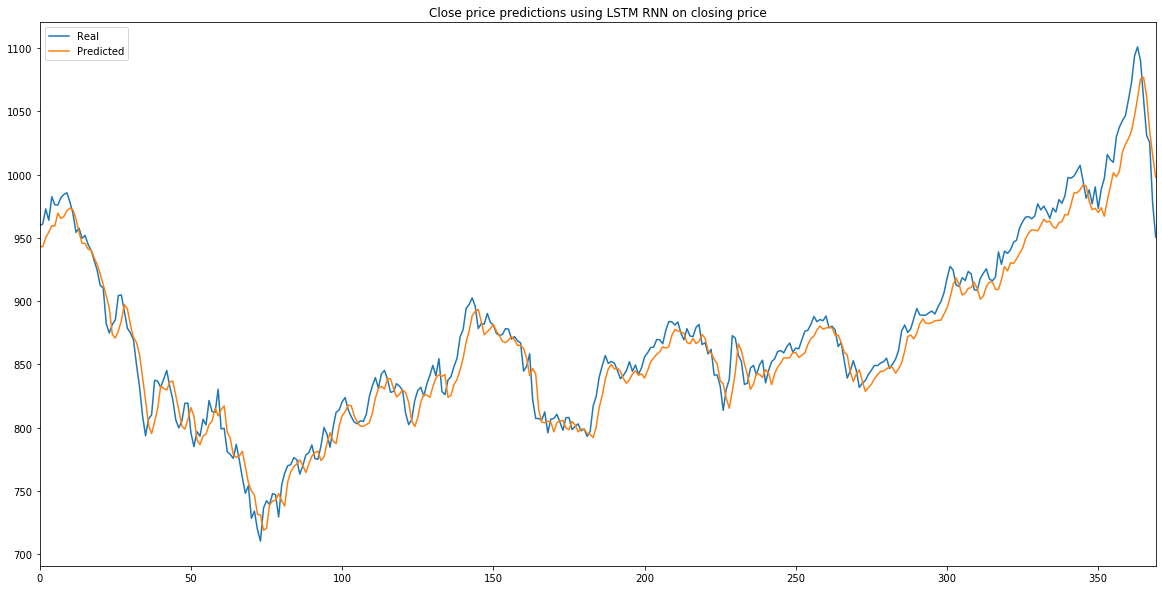

In [89]:
# Plot the real vs predicted values as a line chart
STOCK_CLOSE2 = stock_closing2.plot(title='Close price predictions using LSTM RNN on closing price',figsize=(20,10))

In [90]:
real_prices2 = week2_stocks[week2_stocks.columns[feature_column]]['2020-03-09':'2020-03-13'].tolist()

In [91]:
A = week2_stocks.loc['2020-03-09':'2020-03-13'].index

In [92]:
out_of_sample2 = pd.DataFrame({'Real_Prices':real_prices2,
                          'Look_Fwd_Prices':fwd_prices2},
                          index=A)
out_of_sample2

Real_Prices  Look_Fwd_Prices
date                                    
2020-03-09  1006.942041      1390.000093
2020-03-10  1029.190233      1438.416243
2020-03-11   987.538412      1309.822594
2020-03-12   913.844031      1308.832261
2020-03-13   940.232126      1247.870936

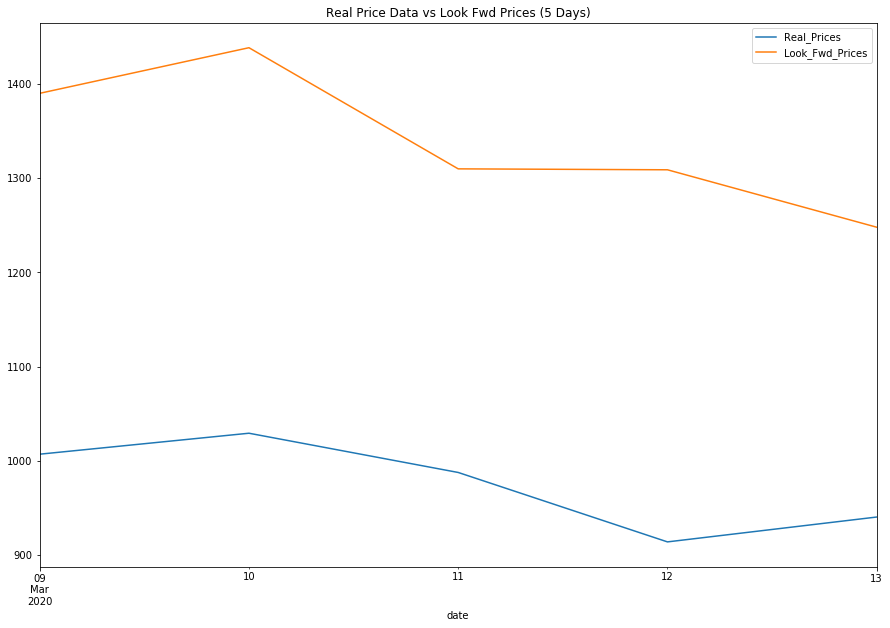

In [93]:
OUT_SAMP2 = out_of_sample2.plot(figsize=(15,10), title='Real Price Data vs Look Fwd Prices (5 Days)')

In [94]:
look_fwd2 = pd.concat([week2_stocks[week2_stocks.columns[feature_column2]][:'2020-03-13'],out_of_sample2],axis=1,join='outer')

In [95]:
look_fwd_2020_2=look_fwd2.iloc[-90:]

In [96]:
look_fwd_2020_2.drop(columns=['Real_Prices'], inplace=True)
look_fwd_2020_2

C:\Users\selva\Anaconda3\envs\vizenv\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



portfolio_value  Look_Fwd_Prices
date                                        
2019-11-04       866.085186              NaN
2019-11-05       873.297213              NaN
2019-11-06       869.757840              NaN
2019-11-07       867.481442              NaN
2019-11-08       871.141936              NaN
...                     ...              ...
2020-03-09      1006.942041      1390.000093
2020-03-10      1029.190233      1438.416243
2020-03-11       987.538412      1309.822594
2020-03-12       913.844031      1308.832261
2020-03-13       940.232126      1247.870936

[90 rows x 2 columns]

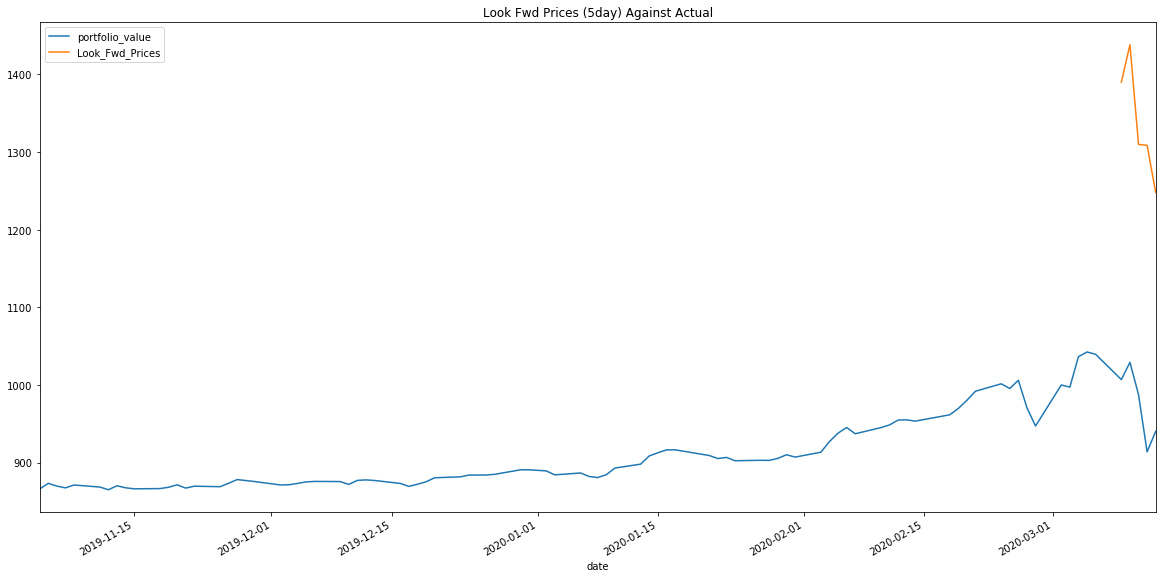

In [97]:
LOOK_FWD_2020_2 = look_fwd_2020_2.plot(figsize=(20,10),title='Look Fwd Prices (5day) Against Actual')

# Create Dashboard Layout

In [98]:
import plotly.express as px
import hvplot.pandas

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [99]:
short_stocks.reset_index(inplace=True)

In [100]:
short_stocks = short_stocks.loc[1235:1256]

In [101]:
short_stocks2.reset_index(inplace=True)

In [102]:
short_stocks2 = short_stocks2.loc[1235:1256]

In [103]:
# Momentum
def short_results1():
    result1 = px.line(
        short_stocks,
        title="Portfolio Value",
        y='portfolio_value',
        x='date')
    return result1

def short_results2():
    result2 = px.line(
        short_stocks2,
        title="Portfolio Value",
        y='portfolio_value',
        x='date')
    return result2

In [104]:
look_fwd_2020.reset_index(inplace=True)

In [105]:
look_fwd_2020_2.reset_index(inplace=True)

In [106]:
stock_closing.reset_index(inplace=True)

In [107]:
stock_closing2.reset_index(inplace=True)

In [108]:
# LSTM 
def lstm_model1():
    model_summary1 = model.summary()
    return model_summary1

def lstm_model2():
    model_summary2 = model2.summary()
    return model_summary2

def stock_close1():
    stock_close_plot1 = px.line(
        stock_closing.melt(id_vars='index'),
        x='index',
        y='value',
        color='variable',
        title="Close Price Predictions using LSTM RNN on Closing Price")
    return stock_close_plot1

def stock_close2():    
    stock_close_plot2 = px.line(
        stock_closing2.melt(id_vars='index'),
        x='index',
        y='value',
        color='variable',
        title="Close Price Predictions using LSTM RNN on Closing Price")
    return stock_close_plot2

def forward_2020_1():
    LOOK_FWD_2020 = px.line(
        look_fwd_2020.melt(id_vars="date"), 
        x='date', 
        y='value', 
        color='variable',
        title='Look Fwd Prices (5-days) Against Actual')
    return LOOK_FWD_2020

def forward_2020_2():
    LOOK_FWD_2020_2 = px.line(
        look_fwd_2020_2.melt(id_vars="date"),
        x='date',
        y='value',
        color='variable',
        title='Look Fwd Prices (5-days) Against Actual')
    return LOOK_FWD_2020_2

In [109]:
# Tab for Momentum
momentum_col = pn.Column(
    '## Short-term Stocks',
    x_short,
    '## Mid-term Stocks',
    x_mid
)

momentum_results = pn.Column(
    '## Momentum: Short-term - Week 1',
    short_results1(),
    '## Momentum: Short-term - Week 2',
    short_results2()
)

In [110]:
# Tab for LSTM
LSTM_row = pn.Row(
    "## LSTM Summary", 
    lstm_model1(),
    lstm_model2()
)

IN_SAMP_row = pn.Row(
    stock_close1(),
    stock_close2()
)

OUT_SAMP_row = pn.Row(
    forward_2020_1(),
    forward_2020_2()
)

comparison_col = pn.Column(
    LSTM_row,
    IN_SAMP_row,
    OUT_SAMP_row
)

WK1_col = pn.Column(
    lstm_model1(),
    stock_close1(),
    forward_2020_1()
)

WK2_col = pn.Column(
    lstm_model2(),
    stock_close2(),
    forward_2020_2()
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 2, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

In [111]:
# Create tabs for dashboard
dashboard = pn.Tabs(
    ("Momentum Stock Selection", momentum_col),
    ("Momentum Stock Results", momentum_results),
    ("Comparison using LSTM", LSTM_row),
    ("LSTM - Week 1", WK1_col),
    ("LSTM - Week 2", WK2_col)
)

In [112]:
# Execute servable function using dashboard variable
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame, classes=['panel-df'])
        [2] Markdown(str)
        [3] DataFrame(DataFrame, classes=['panel-df'])
    [1] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Markdown(str)
        [3] Plotly(Figure)
    [2] Row
        [0] Markdown(str)
        [1] Str(Empty)
        [2] Str(Empty)
    [3] Column
        [0] Str(Empty)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [4] Column
        [0] Str(Empty)
        [1] Plotly(Figure)
        [2] Plotly(Figure)